<a href="https://colab.research.google.com/github/KPxto/imersao-dados-alura/blob/main/Aula1%262_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Vamos carregar nossos dados

In [2]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

In [3]:
dados = pd.read_csv(fonte)

In [4]:
# variaveis utilizadas no codigo
materias = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [28]:
# função para plotar boxplot (que será muito utilizado)

def box_plot(x, y, df, ordem=None, hue=None, titulo=None):
    plt.figure(figsize=(10,8))
    sns.boxplot(x=x, y=y, data=df, 
            order=ordem, hue=hue)
    plt.title(titulo, fontsize=14);

### Como será a distribuição por estado de candidatos com até 14 anos de idade?

* Vemos que os 4 primeiros sao de estados do norte-nordeste

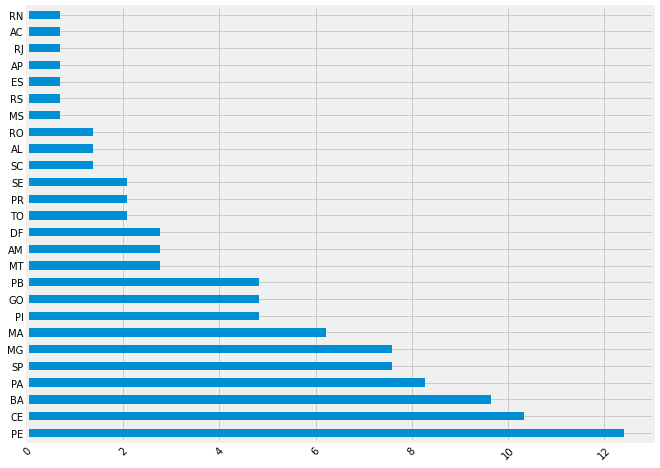

In [5]:
round(dados.query("NU_IDADE <= 14")['SG_UF_RESIDENCIA'].value_counts(normalize=True) * 100, 2).plot(kind='barh', figsize=(10,8))
plt.xticks(rotation=45);

In [9]:
renda_ordenada = dados['Q006'].unique()

In [10]:
renda_ordenada.sort()

### Como o nível de renda afeta nas notas de matemática?

A ordem da renda está de menor para maior, ou seja, A e Q são o mínimo e máximo respectivamente. 

Percebe-se claramente que quanto maior a renda maior a nota de matematica.

Tambem é interessante notar que nas menores rendas as notas mais altas são outliers, quer dizer, exceções à regra.

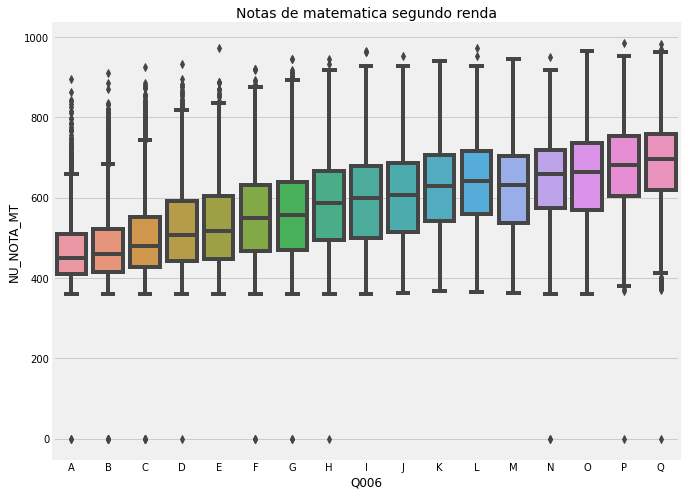

In [29]:
# vamos fazer um boxplot comparando as notas nas provas de matematica por renda do candidato
box_plot('Q006', 'NU_NOTA_MT', dados, ordem=renda_ordenada,
        titulo='Notas de matematica segundo renda')

### E como a renda afeta no total das notas?

O grafico abaixo é um reflete a desigualdade da sociedade brasileira.

O nível de renda afeta diretamente o desempenho do candidato na prova.

As notas mais baixas vão se tornando exceção à medida que a renda aumenta.

Ainda nas rendas mais altas, as caixas menores mostradas no gráfico indicam uma concentração das notas mais altas por esta classe.

Em contrapartida, é notória a concentração de notas menores entre as classes A e D.

In [12]:
# somatorio de todas as notas por candidato
# vamos criar uma nova coluna para isso
dados["NU_NOTA_TOTAL"] = dados[materias].sum(axis=1)

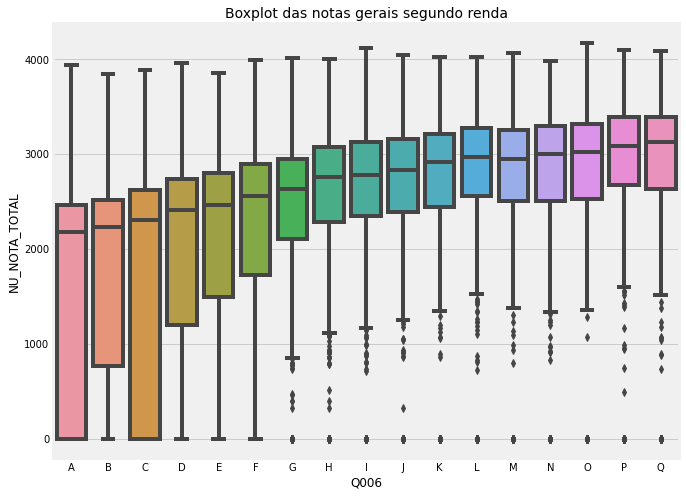

In [14]:
box_plot('Q006', 'NU_NOTA_TOTAL', dados, ordem=renda_ordenada,
        titulo='Boxplot das notas gerais segundo renda')

### Qual a relação da renda com a nota zero em todas provas do ENEM?

Mais um grafico corroborando como o nivel de renda afeta no desempenho do ENEM. Só foram computados candidatos que não tiraram em nenhuma das provas.
    
O gráfico indica que as classes menores também tiveram as menores notas.

Mesmo não zerando nenhuma prova, ainda não conseguem concorrer com as classes de maior renda.

Esta situação fomenta um ciclo vicioso em que as maiores rendas terão acesso às melhores vagas na educação superior, fazendo perpetuar as desigualdades econômico-sociais.  

In [15]:
# vamos pegar o dataframe somente dos candidatos que tiraram nota 0 em todas provas
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")

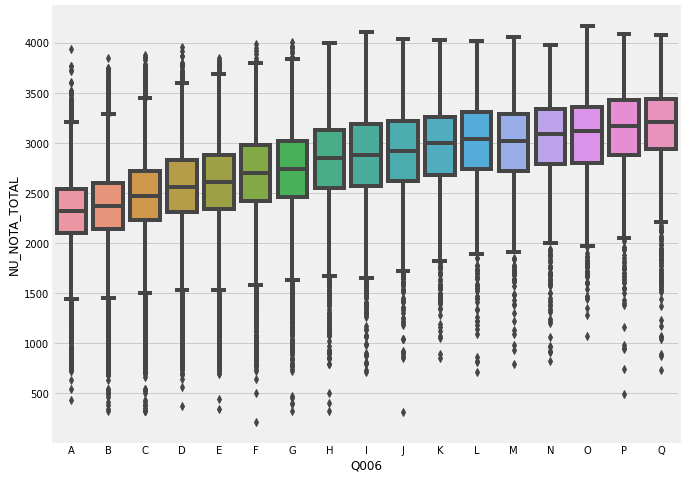

In [30]:
# vamos novamente usar o boxplot para fazer a comparação
box_plot('Q006', 'NU_NOTA_TOTAL', dados_sem_nota_zero, ordem=renda_ordenada)

### Agora vejamos se a renda influencia o numero de candidatos que vao so para treinar

Quanto maior a renda mais treineiros tem.

Isso da tempo e experiencia para os mais abastados se preparem para as provas futuras e garantirem as vagas.

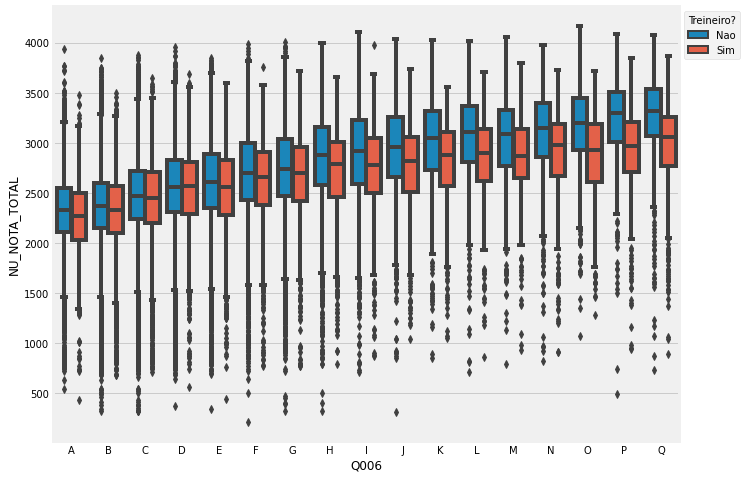

In [45]:
# vamos aqui adicionar um terceiro ponto de analise e cruzamento de dados com o parametro hue
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_nota_zero, 
            order=renda_ordenada, hue='IN_TREINEIRO')
handles = ax.get_legend_handles_labels()
ax.legend(title='Treineiro?', handles=handles[0], labels=['Nao', 'Sim'], bbox_to_anchor=(1, 1));

### Quem eh eliminado tira zero ou sera NaN (nao teve registro de notas)

In [32]:
# quem eh eliminado ganha NaN, ou seja, nulo
# aqui esta um candidato e suas respectivas notas

dados.iloc[3839][materias]

NU_NOTA_CN         428.4
NU_NOTA_CH           NaN
NU_NOTA_MT         450.8
NU_NOTA_LC           NaN
NU_NOTA_REDACAO      NaN
Name: 3839, dtype: object

In [54]:
# o codigo 2 revela que o mesmo foi eliminado da prova na qual tirou NaN

dados.iloc[3839]['TP_PRESENCA_LC']

2

### Como as notas são influenciadas de acordo com o acesso do candidato à internet ou não?

Na pergunta 025 do questionário sócio econômico, os candidatos responderam se tem acesso à internet em suas residências.

Perceba no gráfico abaixo que a internet tem influencia direta no desempenho do candidato.

Mesmo entre os participantes da mesma classe social existe uma clara diferença na distribuição das notas entre quem tem internet e quem não tem.

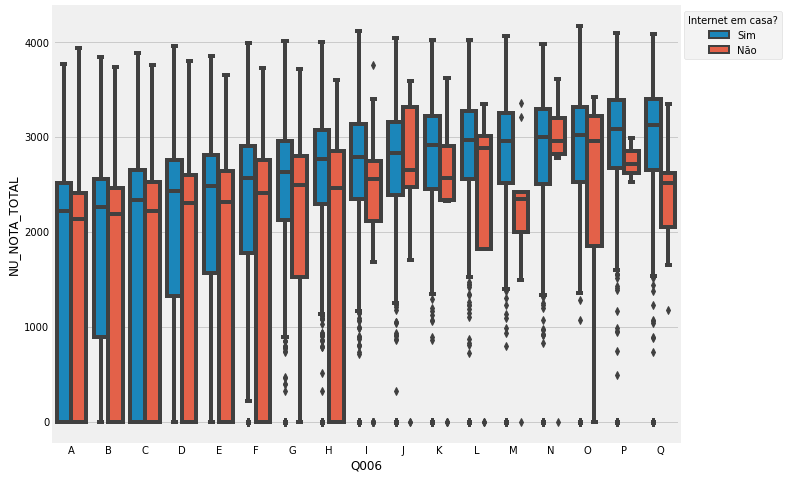

In [55]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Q006', y="NU_NOTA_TOTAL", data=dados, hue='Q025', order=renda_ordenada)

handles = ax.get_legend_handles_labels()[0]
ax.legend(title='Internet em casa?', handles=handles, labels=['Sim', 'Não'], bbox_to_anchor=(1, 1));